In [1]:
import DMM_socket as d
import matplotlib.pyplot as plt
import numpy as np
#from scipy.signal import butter, lfilter,lfilter_zi
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
import math as m
import statistics as stat
import time
import allantools
#from allan_variance import allan_variance, params_from_avar


Rrite time= 0.004792690277099609 [sec.]
Start =  0.012190806063333334   End= 0.012200398236800001   Gain= -1.1099483298619941e-10
Sigma= 6.844833057890799e-07 Begin= 0.012191228689005167 End= 0.012189866337528166   len= 86420


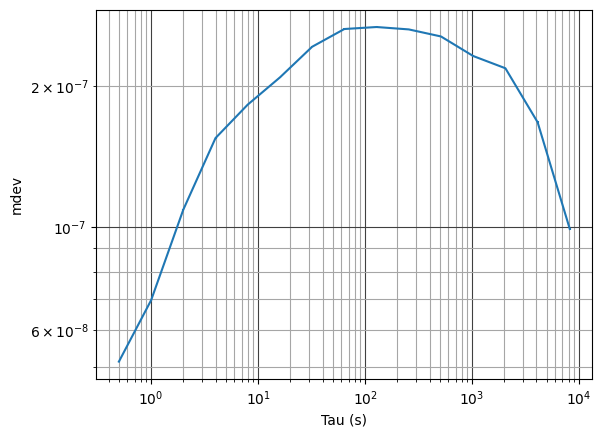

In [3]:
#f_name = 'hp34970.pkl'
#f_name = 'array3500.pkl'
#f_name = 'hp34970.pkl'
f_name = 'dmm6500_12mv_3pe.pkl'
f_name = 'array_12mv_1pre.pkl'
#f_name = 'hp34970_tc1.pkl'
#f_name = 'dmm6500_100mv_1pe.pkl'
#f_name = 'dmm6500_154mv_2pe.pkl'
#f_name = 'dmm6500_240mv_1pe.pkl'
#f_name = 'dmm6500_57mv_1pe.pkl'
f=d.fast_file()
data_set_raw= f.load (f_name)
data_set = data_set_raw
start = np.mean(data_set_raw[10:250])
end   = np.mean(data_set_raw[-250:])
len = data_set_raw.size
gain  = (start - end) / len

print ("Start = ",start,  "  End=", end,"  Gain=",gain)
for i in range (int(len)):    
  data_set[i]= data_set_raw[i]+ gain*i
data_set[0] = data_set[10] #first sample is alway wrong . Overwrite it
Fs = 4

print ('Sigma=',np.std(data_set),'Begin=',data_set[1],'End=',data_set[len-1],'  len=',len)
# Compute a deviation using the Dataset class
a = allantools.Dataset(data=data_set, rate=2.0, data_type='freq')
a.compute("mdev")
# New in 2019.7 : write results to file
#a.write_result("output.dat")
# Plot it using the Plot class
b = allantools.Plot()
# New in 2019.7 : additional keyword arguments are passed to
# matplotlib.pyplot.plot()
b.plot(a, errorbars=True, grid=True)
# You can override defaults before "show" if needed
b.ax.set_xlabel("Tau (s)")
b.show()

-1.1599730053157842e-06    -1.2699730053133962e-06
Mean= 0.23937237744601642    StDev= 1.8225471642761341e-06   Min= 0.23936042014772899   Max= 0.2393793200517129
Vpp = 1.8899903983904398e-05


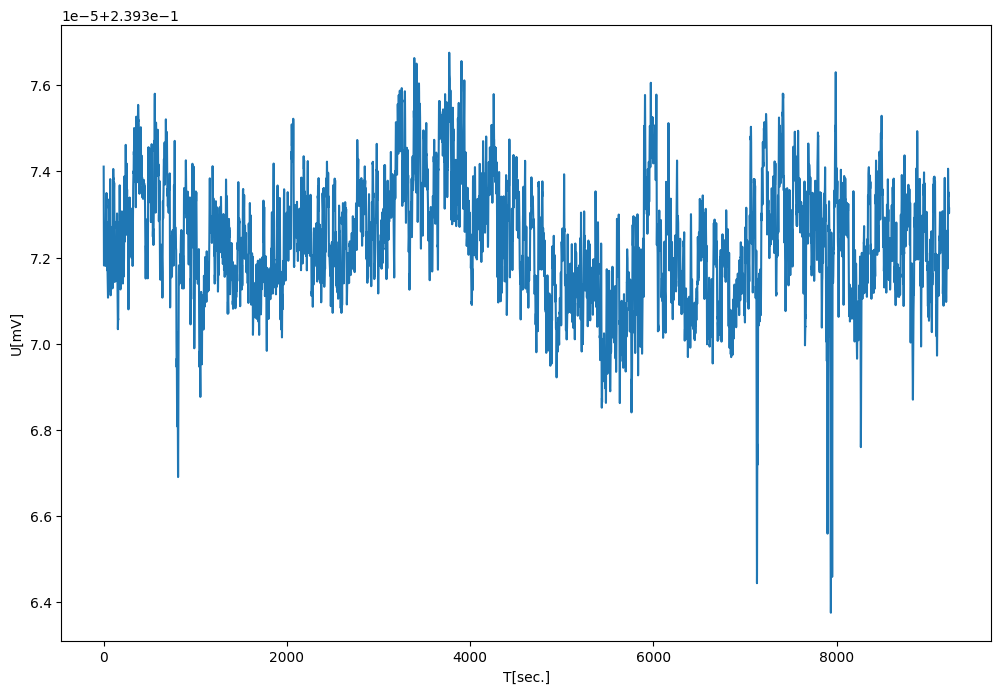

In [12]:
from scipy.signal import butter, filtfilt
b,a  = butter (N=2, Wn=0.05,btype='low',analog=False)
y = filtfilt(b,a,data_set)
t=np.linspace (0,int(len/Fs),int(len))
plt.figure(figsize=(12,8))
#plt.plot(t,data_set*1000)
plt.xlabel('T[sec.]')
plt.ylabel('U[mV]')
#plt.plot(t[20600:20700],data_set[20600:20700])
plt.plot(t,y)
print (data_set[101]-data_set[102], '  ',data_set[102]-data_set[103])
print ('Mean=',np.mean(data_set),'   StDev=',np.std(data_set),'  Min=',np.min(data_set),'  Max=',np.max(data_set))
print ('Vpp =',np.max(data_set)-np.min(data_set))
plt.show()

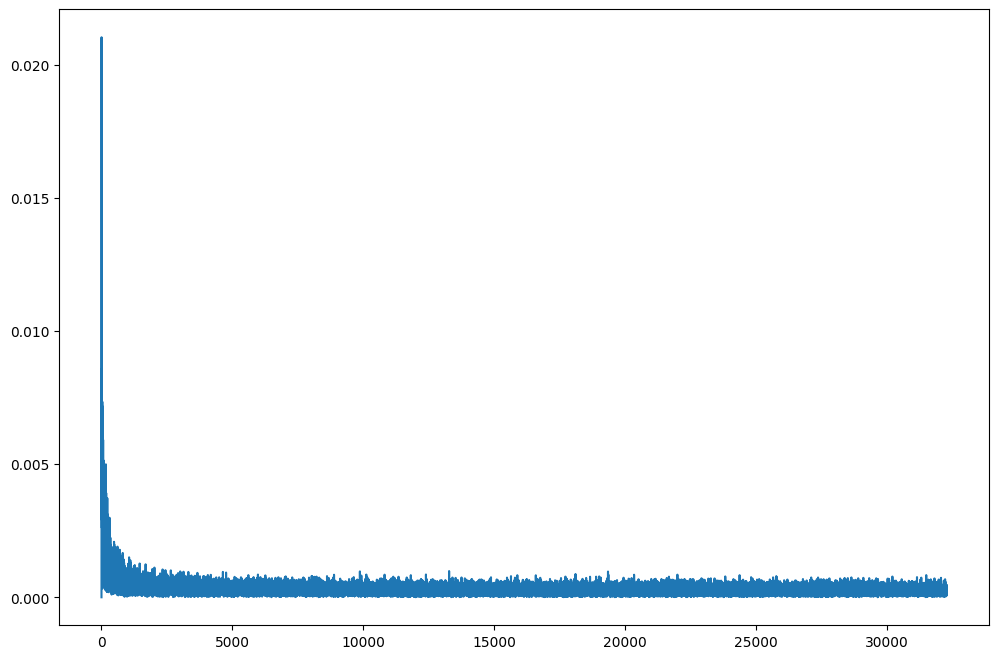

In [11]:
Fs=7
sp = np.fft.fft(data_set-np.mean(data_set))
freq = np.fft.fftfreq(data_set.size,d=1/Fs)
plt.figure(figsize=(12,8))
#plt.plot(freq, sp.real, freq, sp.imag)
ampl=np.sqrt(sp.real*sp.real+sp.imag*sp.imag)
#plt.plot(freq[0:350],ampl[0:350])
plt.plot(ampl[:int(len/2-1)])
plt.show()

Rrite time= 0.007747173309326172 [sec.]
Start =  0.23937242491666666   End= 0.23937416872   Gain= -2.6994695398352675e-11
Sigma= 1.8225471642761341e-06 Begin= 0.2393718499730053 End= 0.23937327622366134   len= 64598


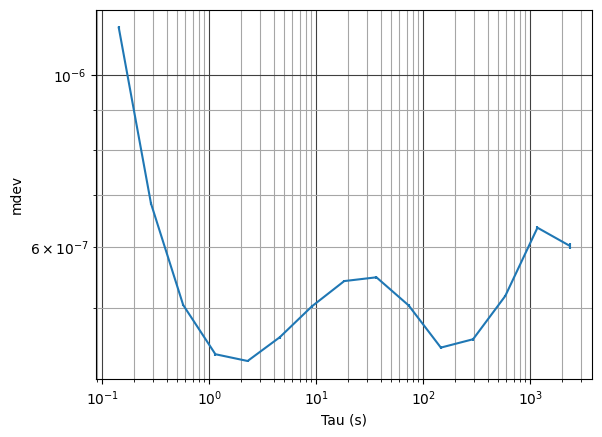

In [10]:
f_name = 'hp34970_tc3.pkl'
f_name = 'hp34970_tc1_51mv.pkl'
f_name = 'hp34970_tc1_150mv.pkl'
f_name = 'hp34970_tc2_150mv_10plc.pkl'
f_name = 'hp34970_tc1_240mv_10plc.pkl'
f=d.fast_file()
data_frame= f.load (f_name)
data_set_raw = data_frame['dV']
data_set = data_set_raw
start = np.mean(data_set_raw[10:250])
end   = np.mean(data_set_raw[-250:])
len = data_set_raw.size
gain  = (start - end) / len

print ("Start = ",start,  "  End=", end,"  Gain=",gain)
for i in range (int(len)):    
  data_set[i]= data_set[i]+ gain*i
data_set[0] = data_set[10] #first sample is alway wrong . Overwrite it
Fs = 7.0

print ('Sigma=',np.std(data_set),'Begin=',data_set[1],'End=',data_set[len-1],'  len=',len)
# Compute a deviation using the Dataset class
a = allantools.Dataset(data=data_set_raw, rate=Fs, data_type='freq')
a.compute("mdev")
# New in 2019.7 : write results to file
#a.write_result("output.dat")
# Plot it using the Plot class
b = allantools.Plot()
# New in 2019.7 : additional keyword arguments are passed to
# matplotlib.pyplot.plot()
b.plot(a, errorbars=True, grid=True)
# You can override defaults before "show" if needed
b.ax.set_xlabel("Tau (s)")
b.show()

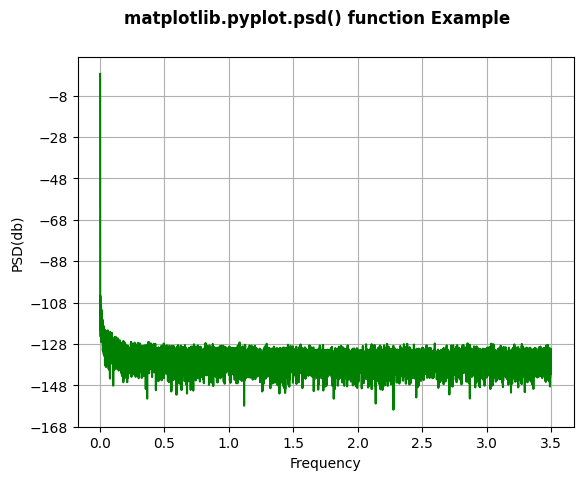

In [5]:
plt.psd(data_set**2, 32768, Fs, color ="green")
plt.xlabel('Frequency') 
plt.ylabel('PSD(db)') 
  
plt.suptitle('matplotlib.pyplot.psd() function Example', fontweight ="bold") 
  
plt.show() 